# $$\textit{Power}$$
$$\text{Schwartz}$$



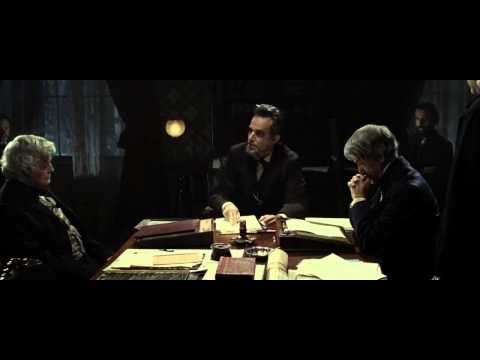

In [1]:
from IPython.display import YouTubeVideo
from datetime import timedelta
YouTubeVideo("1qjtugr2618", start=int(timedelta(minutes=2, seconds=11).total_seconds()))

In [2]:
# say you've got a sample

from scipy import stats
#sample = stats.poisson.rvs(mu=10, size=30)

sample

NameError: name 'sample' is not defined

# Say you've got a hypothesis 

# $H_0: \mu \leq 10$

# What test statistic will you use to test your hypothesis?

In [3]:































import numpy as np

#np.mean(sample)

# why $\bar X$?

# $\begin{align}
E[\bar X] &= \mu\\
Var[\bar X] &= Var[X]/n \\
&= \sigma^2_X/n
\end{align}$

# What is the sampling distribution of $\bar X$?

# $\bar X \sim Normal\left(E[X], Var[X]/n\right) = Normal\left(\mu, \sigma_X^2/n\right)$
### (by the Central Limit Theorem)
# What is the sampling distribution of $\frac{\bar X-\mu}{\sigma_X/\sqrt{n}}$?

# $Normal(0,1)$

### (by the Central Limit Theorem and properties of expectation and variance)

# Wait... what is $\sigma^2_X$?

# We'll estimate it with $s = \sqrt{\sum_{i=1}^n\frac{(X_i-\bar X)^2}{n-1}}$

In [4]:
#s2 = sum((sample-np.mean(sample))**2/n-1
#s2 = np.var(sample,ddof=1)
s2

NameError: name 's2' is not defined

# What is the sampling distribution of $\frac{\bar X-\mu}{\sqrt{\frac{\sum_{i=1}^n\frac{(X_i-\bar X)^2}{n-1}}{n}}} = \frac{\bar X-\mu}{s/\sqrt{n}}$?

# $t_{n-1}$

### (where $n-1$ is the degrees of freedom)

# How will we decide if we reject $H_0 (\mu \leq 10)$?

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

Critical Region Cutoff: 1.31
Significance Level: 0.1


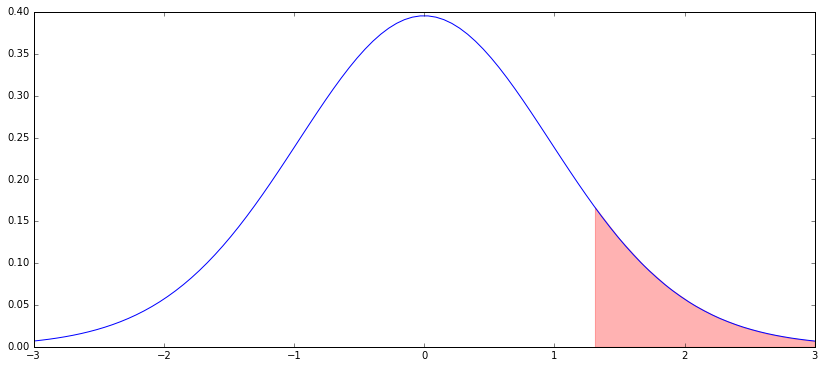

In [6]:
n = 30
support = np.linspace(-3,3,100)
plt.plot(support, stats.t.pdf(support, df=n-1))

critical_cutoff = stats.t.ppf(.9, n-1)
critical_area = np.linspace(critical_cutoff,3,10)
plt.fill_between(critical_area, stats.t.pdf(critical_area, n-1), 0, alpha=.3, color="red")

print "Critical Region Cutoff: " + str(round(critical_cutoff, 2))
print "Significance Level: " + str(round(1-stats.t.cdf(critical_cutoff, df=n-1),2))

In [7]:
# So what is a p-value of xbar?

xbar = 10.9
s2 = 10. # remember this had an "n-1" in the denomenator
n = 30
mu = 10

test_statistic = (xbar - mu)/np.sqrt(s2/n)
print "Test Statistic: " + str(round(test_statistic,2))

Test Statistic: 1.56


Critical Region Cutoff: 1.31
Significance Level: 0.1
Test Statistic: 1.56


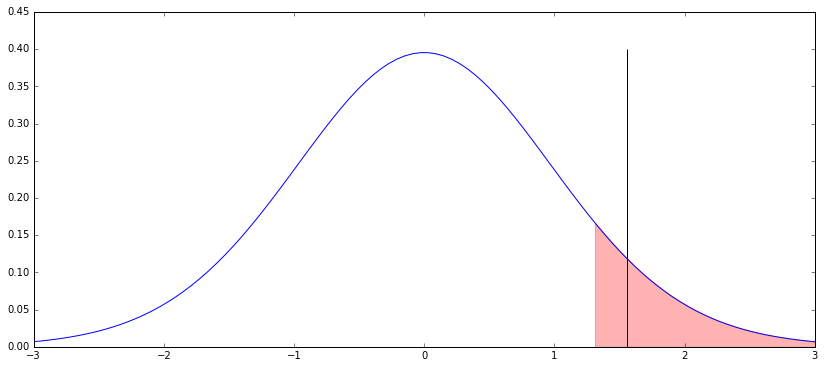

In [8]:
plt.plot(support, stats.t.pdf(support, df=n-1))

critical_cutoff = stats.t.ppf(.9, n-1)
critical_area = np.linspace(critical_cutoff,3,10)
plt.fill_between(critical_area, stats.t.pdf(critical_area, n-1), 0, alpha=.3, color="red")

plt.vlines(test_statistic, 0, .4)

print "Critical Region Cutoff: " + str(round(critical_cutoff, 2))
print "Significance Level: " + str(round(1-stats.t.cdf(critical_cutoff, df=n-1),2))
print "Test Statistic: " + str(round(test_statistic,2))

P-value: 0.06


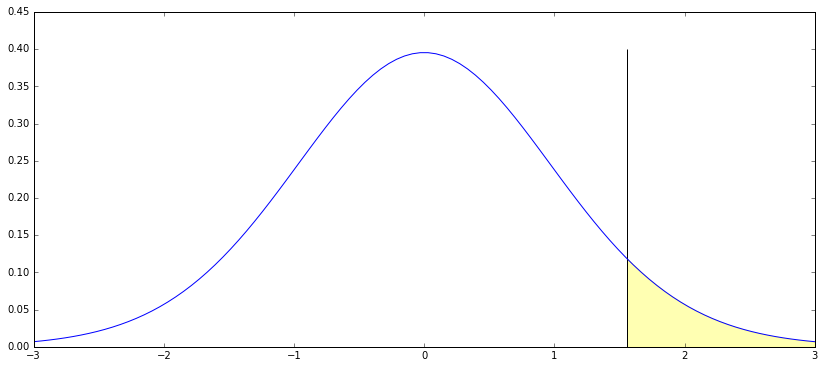

In [9]:
plt.plot(support, stats.t.pdf(support, df=n-1))

plt.vlines(test_statistic, 0, .4)
p_value_area=np.linspace(test_statistic,3,10)
plt.fill_between(p_value_area, stats.t.pdf(p_value_area, n-1), 0, alpha=.3, color="yellow")

print "P-value: " + str(round(1-stats.t.cdf(test_statistic, df=n-1), 2))

# What was the chance that we rejected $H_0$?

# YOU DON'T HAVE ENOUGH INFORMATION TO ANSWER THAT OMG!!!

# First, was $H_0$ _even true_?

# IF SO *then* we chose the chance of _incorrectly rejecting_ $H_0$ to be an "unlikely" 0.10 (although it's more "common" to choose 0.05).

# But what if $H_0$ wasn't true, but something else, say $H_A$ was true?
# $\underline{Power} \text{ rather asks: what was the chance that we rejected } H_0 \underline{\text{ if $H_A$ is true}}$?

### (As opposed to $H_0$)

# Okay, wait... what the heck is $H_A$?

# Let's say

# $\begin{align}
H_0: &\mu = 10\\
H_A: &\mu = 11.5
\end{align}$

# (So _Effect Size_ is +1.5)

Critical Region Cutoff: 10.98
Power: 0.81


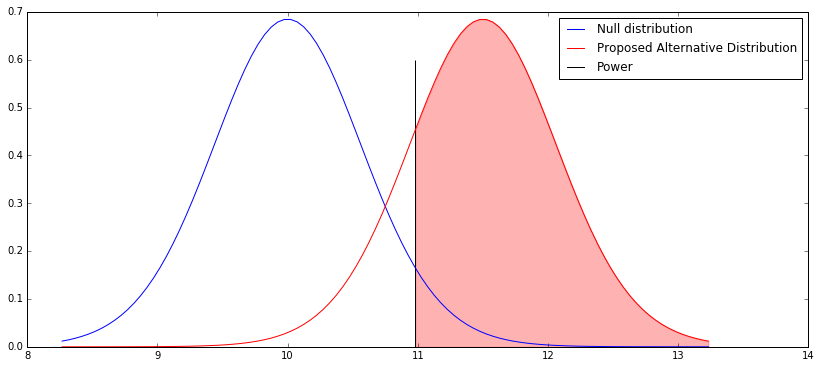

In [12]:
H_0 = 10
H_A = 11.5# 12.5

support = np.linspace(min(H_0,H_A)-3*np.sqrt(s2/n),max(H_0,H_A)+3*np.sqrt(s2/n),100)
plt.plot(support, stats.t.pdf(support, loc = H_0, scale = np.sqrt(s2/n), df=n-1), color='b')
plt.plot(support, stats.t.pdf(support, loc = H_A, scale = np.sqrt(s2/n), df=n-1), color='r')

critical_cutoff = stats.t.ppf(.95, loc = H_0, scale = np.sqrt(s2/n), df=n-1)
plt.vlines(critical_cutoff, 0, .6)
print "Critical Region Cutoff: " + str(round(critical_cutoff, 2))
critical_area = np.linspace(critical_cutoff, max(support), 100)
plt.fill_between(critical_area, stats.t.pdf(x = critical_area, loc = H_A, scale = np.sqrt(s2/n), df=n-1), 0, alpha=.3, color="red")
print "Power: " + str(round(1-stats.t.cdf(x=critical_cutoff, loc = H_A, scale = np.sqrt(s2/n), df = n - 1), 2))
plt.legend(["Null distribution", "Proposed Alternative Distribution", "Power"],loc="best")

# Let's say

# $\begin{align}
H_0: &\mu = 10\\
H_A: &\mu = 12.5
\end{align}$

# (So _Effect Size_ is +2.5)

<br>
<br> 

# What else can we do to increase power?
# How can we decrease power?


Power: 0.91


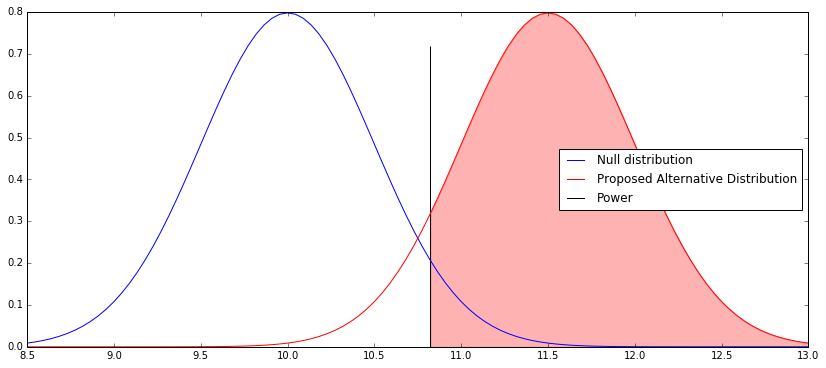

In [20]:
H_0 = 10
H_A = 11.5

significance_level_alpha = .05

s2 = 10. # remember this had an "n-1" in the denomenator
n = 40
mu = H_0

support = np.linspace(min(H_0,H_A)-3*np.sqrt(s2/n),max(H_0,H_A)+3*np.sqrt(s2/n),100)
plt.plot(support, stats.norm.pdf(support, loc = H_0, scale = np.sqrt(s2/n)), color='b')
plt.plot(support, stats.norm.pdf(support, loc = H_A, scale = np.sqrt(s2/n)), color='r')

critical_cutoff = stats.norm.ppf(1-significance_level_alpha, loc = H_0, scale = np.sqrt(s2/n))
plt.vlines(critical_cutoff, 0, .9*stats.norm.pdf(H_0, loc = H_0, scale = np.sqrt(s2/n)))

print "Power: " + str(round(1-stats.t.cdf(x=critical_cutoff, loc = H_A, scale = np.sqrt(s2/n), df = n - 1),2))
critical_area = np.linspace(critical_cutoff,max(H_0,H_A)+3*np.sqrt(s2/n),100)
plt.fill_between(critical_area, stats.norm.pdf(x=critical_area, loc = H_A, scale = np.sqrt(s2/n)), 0, alpha=.3, color="red")
plt.legend(["Null distribution", "Proposed Alternative Distribution", "Power"],loc="best")

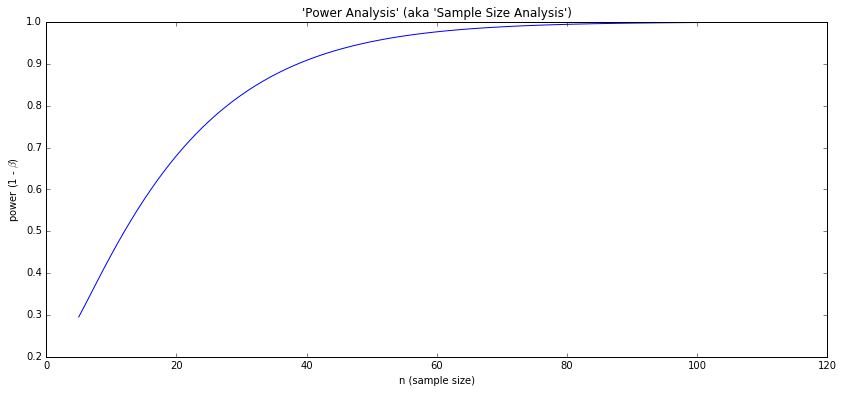

In [21]:
power = []
sample_sizes = range(5,120)
for n in sample_sizes:
    critical_cutoff = stats.norm.ppf(1-significance_level_alpha, loc = H_0, scale = np.sqrt(s2/n))
    power = power + [1-stats.t.cdf(x=critical_cutoff, loc = H_A, scale = np.sqrt(s2/n), df = n - 1)]

plt.plot(sample_sizes, power)
plt.xlabel("n (sample size)")
plt.ylabel("power (1 - $\\beta$)")
plt.title("'Power Analysis' (aka 'Sample Size Analysis')")

# What is the significance level of this test for different n?